In [111]:
import numpy as np

# function for accuracy calculation

In [112]:
def accuracy(output,y):
    return np.mean(output==y)

# initialzation function that returns weights and baises for every layer

In [113]:
def initialize_parameters(dimensions):
    np.random.seed(1)
    parameters={}
    for l in range(1,len(dimensions)):
        parameters[f'W{l}']=np.random.randn(dimensions[l],dimensions[l-1])*np.sqrt(2./dimensions[l-1])
        parameters[f'b{l}']=np.zeros((dimensions[l],1))
    return parameters


# activation functions and the derivative function of the Relu

In [114]:
def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return np.where(x>0,1,0)

def softmax(z):
    z-=np.max(z,axis=0,keepdims=True)
    return np.exp(z)/np.sum(np.exp(z),axis=0,keepdims=True)

# the forward propagation function which return the outcome of each layer 

In [115]:
def forward_propagation(x,parameters):
    cache={'A0':x}
    L=len(parameters)//2

    for l in range(1,L):
        cache[f'Z{l}']=parameters[f'W{l}'].dot(cache[f'A{l-1}'])+parameters[f'b{l}']
        cache[f'A{l}']=relu(cache[f'Z{l}'])

    cache[f'Z{L}']=parameters[f'W{L}'].dot(cache[f'A{L-1}'])+parameters[f'b{L}']
    cache[f'A{L}']=softmax(cache[f'Z{L}'])

    return cache

# back propagation function which return the gradient of the weights and baises and gamma and beta

In [116]:
def backward_propagation(y,parameters,cache):
    gradients={}
    L=len(parameters)//2
    m=y.shape[1]

    dZ=cache[f'A{L}']-y
    for l in reversed(range(1,L+1)):
        gradients[f'dW{l}']=1/m*dZ.dot(cache[f'A{l-1}'].T)
        gradients[f'db{l}']=1/m*np.sum(dZ,axis=1,keepdims=True)
        if l>1:
            dZ=parameters[f'W{l}'].T.dot(dZ)*relu_derivative(cache[f'Z{l-1}'])

    return gradients

# this function updates all the parametrs using descent gradient so that the loss function converges to its minimum

In [117]:
def update_parameters(parameters,gradients,learning_rate):
    L=len(parameters)//2
    for l in range(1,L+1):
        parameters[f'W{l}']-=learning_rate*gradients[f'dW{l}']
        parameters[f'b{l}']-=learning_rate*gradients[f'db{l}']
    return parameters

# loss function for multiple classes

In [118]:
def compute_cost(AL,Y):
    m=Y.shape[1]
    cost=-np.sum(Y*np.log(AL+1e-8))/m #log(0) is noy defined
    return cost

# the learning function which is the main function 


In [119]:
import matplotlib.pyplot as plt # to visualize the cost function

In [120]:
def deep_neural_network(x,y,hidden_layers=(128,64),learning_rate=0.01,n_iter=1000,batch_size=32):
    dimensions=[x.shape[0]]+list(hidden_layers)+[y.shape[0]]
    parameters=initialize_parameters(dimensions)
    
    m=x.shape[1]
    costs=[]

    for i in range(n_iter):
        for j in range(0,m,batch_size):
            x_batch=x[:,j:j+batch_size]
            y_batch=y[:,j:j+batch_size]

            cache=forward_propagation(x_batch,parameters)
            gradients=backward_propagation(y_batch,parameters,cache)
            parameters=update_parameters(parameters,gradients,learning_rate)

        if i%10==0:
            cache= forward_propagation(x,parameters)
            cost=compute_cost(cache[f'A{len(parameters)//2}'],y)
            costs.append(cost)
            print(f"Iteration {i}, cost: {cost:.4f}")

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate ="+str(learning_rate))
    plt.show()

    return parameters

# prediction function that let us classifi an image out of our datasets

In [121]:
def predict(x,parameters):
    cache=forward_propagation(x,parameters)
    return cache[f'A{len(parameters)//2}']

# function that return the one hot array of y

In [122]:
def one_hot(y):
    (a,b) =y.shape
    m=np.zeros((10,b))
    for i in range(b):
        m[y[0,i],i]=1
    return m

# this function returns the name of the element according to its number

In [123]:
def get_name(n):
    labels={
        0:'T-shirt/top',
        1:'Trouser',
        2:'Pullover',
        3:'Dress',
        4:'Coat',
        5:'Sandal',
        6:'Shirt',
        7:'Sneaker',
        8:'Bag',
        9:'Ankle boot'
    }
    return labels[n]

# using pandas to load the train and test datasets 

In [124]:
import pandas as pd
dataset_train=pd.read_csv("C:/Users/bejao/Desktop/project_0/fashion-mnist_train.csv") #path of the downloaded dataset in the computer
dataset_test=pd.read_csv("C:/Users/bejao/Desktop/project_0/fashion-mnist_test.csv")
dataset_train.head() #take a look at the first 5 elements of the dataset "i don't know why it doesn't work"
dataset_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


# Reshaping the train_test datasets and scalling it to be between 0 & 1 and encode the targets y to zeros and ones

In [125]:
#extracting the Xs and Ys and divide the Xs by 255 which is the maximum

x_train=np.array(dataset_train[dataset_train.columns[1:]]).T/255.
y_train=np.array(dataset_train["label"]).reshape(1,-1)
x_test=np.array(dataset_test[dataset_test.columns[1:]]).T/255.
y_test=np.array(dataset_test["label"]).reshape(1,-1)

# encoding the Ys

y_train_oh=one_hot(y_train)
y_test_oh=one_hot(y_test)

# Neural Network from Scratch for Fashion MNIST Classification

Iteration 0, cost: 0.5165
Iteration 10, cost: 0.3219
Iteration 20, cost: 0.2703
Iteration 30, cost: 0.2374
Iteration 40, cost: 0.2127
Iteration 50, cost: 0.1932
Iteration 60, cost: 0.1785
Iteration 70, cost: 0.1651
Iteration 80, cost: 0.1551
Iteration 90, cost: 0.1458


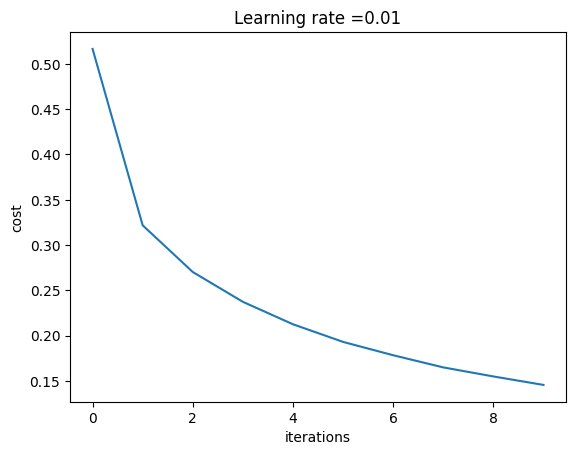

In [126]:
# Define the network architecture,by defining the number of neurons in each hidden layer
t=(128,64)
# Train the model
#learning_rate alpha =0.01
#number of iterations 'epochs' is 100
parameters=deep_neural_network(x_train,y_train_oh,hidden_layers=t,learning_rate=0.01,n_iter=100,batch_size=32)

# evaluating the model using the test dataset

In [127]:
# Evaluate on test set
train_predictions=np.argmax(predict(x_train,parameters),axis=0)
test_predictions=np.argmax(predict(x_test,parameters),axis=0)

train_accuracy=accuracy(y_train.flatten(),train_predictions)
test_accuracy=accuracy(y_test.flatten(),test_predictions)

print(f"Train Accuracy: {train_accuracy*100:.4f}%")
print(f"Test Accuracy: {test_accuracy*100:.4f}%")


Train Accuracy: 94.7833%
Test Accuracy: 88.4800%


# Visualize multiple predictions

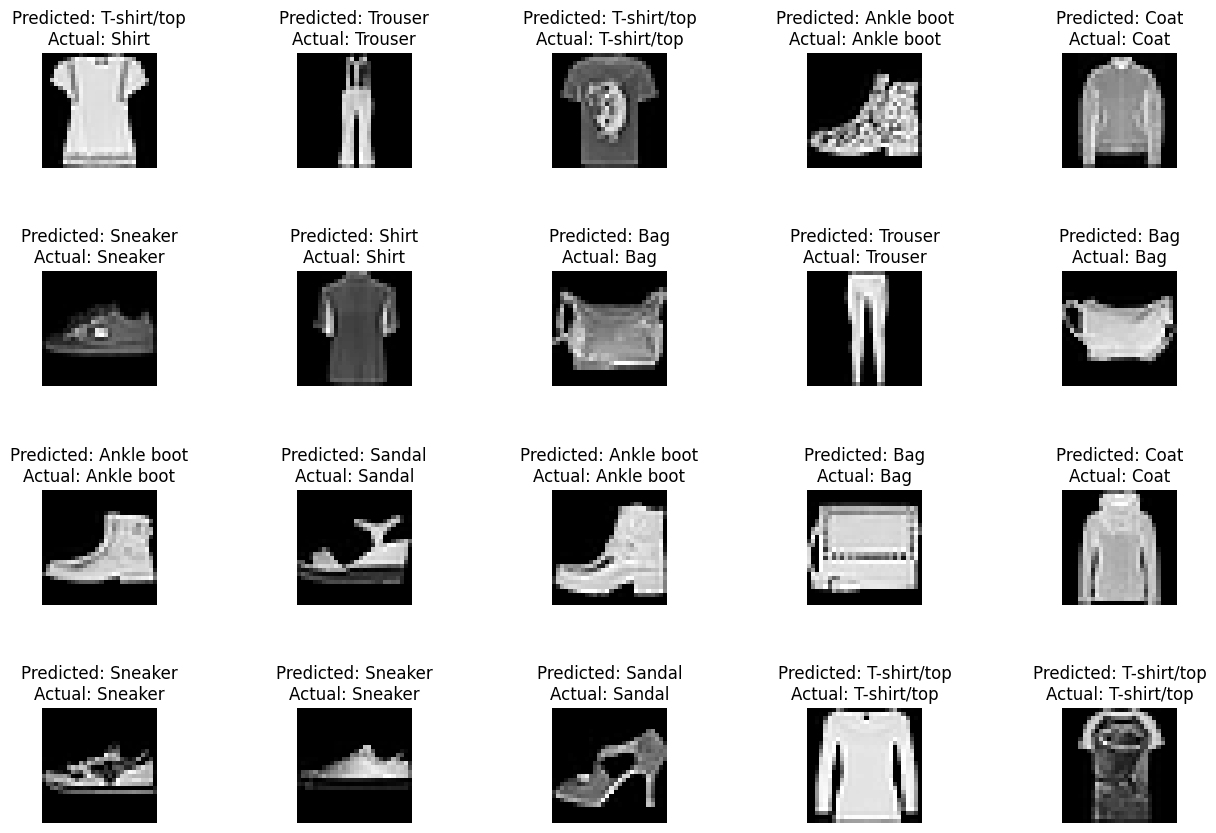

In [131]:
def visualize_multiple_predictions(x,y,parameters, num_samples):
    fig,axes=plt.subplots(4,5,figsize=(15,10))
    fig.subplots_adjust(hspace=0.9,wspace=0.8)
    for _,ax in enumerate(axes.flat):
            i=np.random.randint(10000)
          
            prediction=np.argmax(predict(x[:,i:i+1],parameters),axis=0)
            ax.imshow(x[:,i].reshape(28,28),cmap='gray')
            ax.set_title(f"Predicted: {get_name(prediction[0])}\nActual: {get_name(y[0,i])}")
            ax.axis('off')    
    plt.show()
visualize_multiple_predictions(x_test,y_test,parameters,num_samples=20)

image shape= (1500, 1476)


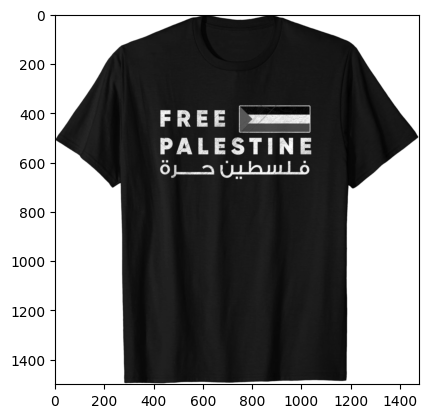

image shape after resizing= (28, 28)


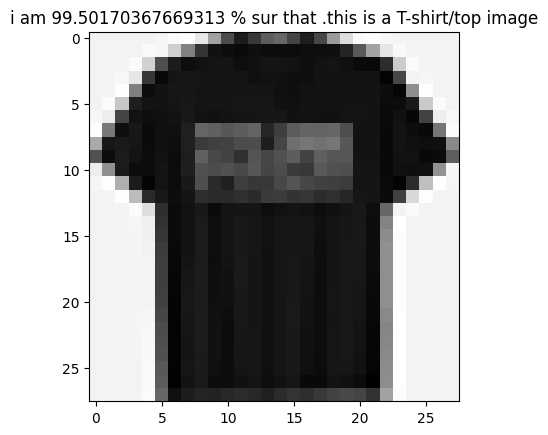

In [133]:
from PIL import Image
#use the PIL library to process the image
image = Image.open("C:/Users/bejao/Desktop/project_0/A13usaonutL._CLa_2140,2000_71bBCr-94uL.png_0,0,2140,2000+0.0,0.0,2140.0,2000.0_AC_UL1500_.jpg")#the imported image path

# convert the image to grayscale by averaging the color channels
# an image is composed by 3 arrays ane red one blue and one green .so to convert an image to black&white image,we can calculate
# the average of those 3 arrays to get a value between 0 and 255
image=np.mean(np.array(image,dtype=float),axis=2)

# Check the shape of the imported image 
print("image shape=",image.shape)

# Display the original grayscale image
plt.imshow(image,cmap='gray')
plt.show()

# Resize the image to 28x28 using PIL before converting to numpy array so that it conforms to the training set shape
image1=Image.fromarray(image).resize((28,28))

# Convert the resized image to a NumPy array
image1=np.array(image1,dtype=float)

# Check the shape of the resized array
print("image shape after resizing=",image1.shape)

# Display the resized image
image1=image1.reshape(28*28,1)/255.
digit=np.argmax(predict(1-image1,parameters),axis=0)[0]
probability=predict(1-image1,parameters)[digit]  
# the background of the image must be white just like our dataset.if not we can invert it by image=1-image 
plt.title("i am "+str(probability[0]*100)+" % sur that .this is a "+str(get_name(int(digit)))+" image")
plt.imshow(image1.reshape(28,28),cmap='gray')
plt.show()

